In [112]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols('x y t n a b C c r u s A i j k z w')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# 1

Find the gradient of the function f(x, y) = sqrt(3x + 4y) at the point (-1, 3)

In [6]:
# Define the function
f = smp.sqrt(3*x + 4*y)

# Compute the partial derivatives
f_x = smp.diff(f, x)
f_y = smp.diff(f, y)

# Substitute the point (-1, 3) into the partial derivatives
grad_x = f_x.subs({x: -1, y: 3})
grad_y = f_y.subs({x: -1, y: 3})

# Print the gradient
print((grad_x, grad_y))

# Answer:
# (1/2)i + (2/3)j

(1/2, 2/3)


/tmp/ipykernel_253115/710980452.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(3*x + 4*y)


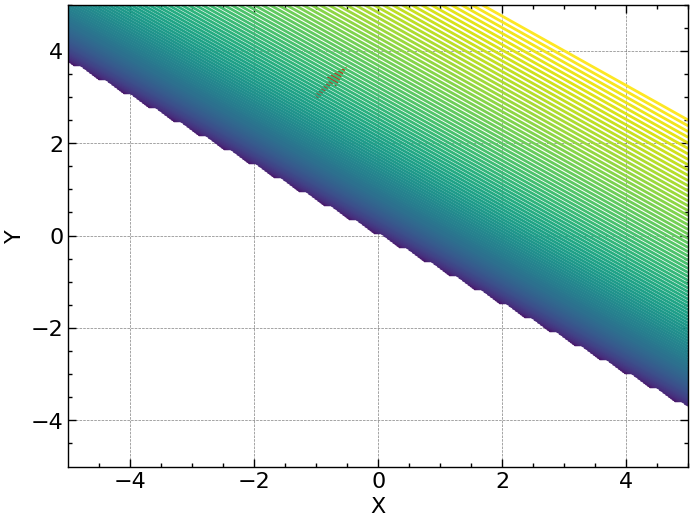

In [9]:
# Define the function
def f(x, y):
    return np.sqrt(3*x + 4*y)

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Compute the function values
z = f(x, y)

# Create a contour plot
plt.figure()
plt.contour(x, y, z, levels=np.linspace(0, 5, 100))

# Compute the gradient at the point (-1, 3)
grad_x = 1/2
grad_y = 2/3

# Add an arrow representing the gradient
plt.quiver(-1, 3, grad_x, grad_y, color='red', angles='xy', scale_units='xy', scale=1)

# Set labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

# 2

Find ▽f at the given point:

f(x, y, z) = x^3 + y^3 - 4z^2 + z(ln(x))

(1, 4, 4)

In [15]:
from sympy import symbols, diff, log

# Define the variables
x, y, z = symbols('x y z')

# Define the function
f = x**3 + y**3 - 4*z**2 + z*log(x)

# Compute the gradient
gradient = [diff(f, var) for var in (x, y, z)]

# Print the gradient
print("The gradient of f is:", gradient)

# Now, let's substitute the point (1, 4, 4) into the gradient
point = {x: 1, y: 4, z: 4}
gradient_at_point = [derivative.evalf(subs=point) for derivative in gradient]

# Print the gradient at the point
print("The gradient of f at the point (1, 4, 4) is:")
gradient_at_point

# Answer:
# 7i + 48j - 32k

The gradient of f is: [3*x**2 + z/x, 3*y**2, -8*z + log(x)]
The gradient of f at the point (1, 4, 4) is:


[7.00000000000000, 48.0000000000000, -32.0000000000000]

# 3

Find the derivative of the function at P_0 in the direction of A

f(x, y, z) = xy + yz + zx

P_0(-2, 2, -1)

A = 2i + 6j - 9k

In [16]:
from sympy import symbols, diff, sqrt
from sympy.vector import CoordSys3D

# Define the function
f = x*y + y*z + z*x

# Compute the gradient
N = CoordSys3D('N')
gradient = diff(f, x)*N.i + diff(f, y)*N.j + diff(f, z)*N.k

# Print the gradient
print("The gradient of f is:")
display(gradient)

# Now, let's substitute the point P_0(-2, 2, -1) into the gradient
P_0 = {x: -2, y: 2, z: -1}
gradient_at_P_0 = gradient.doit().subs(P_0)

# Print the gradient at the point
print("The gradient of f at the point P_0(-2, 2, -1) is:")
display(gradient_at_P_0)

# Define the vector A
A = 2*N.i + 6*N.j - 9*N.k

# Normalize A to get the unit vector in the direction of A
A_normalized = A / sqrt(A.dot(A))

# Print the unit vector in the direction of A
print("The unit vector in the direction of A is:")
display(A_normalized)

# Compute the derivative of the function at P_0 in the direction of A
derivative_at_P_0_in_direction_A = gradient_at_P_0.dot(A_normalized)

# Print the derivative
print("The derivative of the function at P_0 in the direction of A is:")
display(derivative_at_P_0_in_direction_A)

The gradient of f is:


(y + z)*N.i + (x + z)*N.j + (x + y)*N.k

The gradient of f at the point P_0(-2, 2, -1) is:


N.i + (-3)*N.j

The unit vector in the direction of A is:


2/11*N.i + 6/11*N.j + (-9/11)*N.k

The derivative of the function at P_0 in the direction of A is:


-16/11

# 4

Find the derivative of the function P_0 in the direction of A

f(x, y, z) = (8e^x)cos(yz)

P_0(0, 0, 0)

A = -i + 4j +k

In [17]:
from sympy import symbols, diff, sqrt
from sympy.vector import CoordSys3D

# Define the function
f = (8*smp.exp(x))*smp.cos(y*z)

# Compute the gradient
N = CoordSys3D('N')
gradient = diff(f, x)*N.i + diff(f, y)*N.j + diff(f, z)*N.k

# Print the gradient
print("The gradient of f is:")
display(gradient)

# Now, let's substitute the point P_0(0, 0, 0) into the gradient
P_0 = {x: 0, y: 0, z: 0}
gradient_at_P_0 = gradient.doit().subs(P_0)

# Print the gradient at the point
print("The gradient of f at the point P_0(0, 0, 0) is:")
display(gradient_at_P_0)

# Define the vector A
A = -1*N.i + 4*N.j + N.k

# Normalize A to get the unit vector in the direction of A
A_normalized = A / sqrt(A.dot(A))

# Print the unit vector in the direction of A
print("The unit vector in the direction of A is:")
display(A_normalized)

# Compute the derivative of the function at P_0 in the direction of A
derivative_at_P_0_in_direction_A = gradient_at_P_0.dot(A_normalized)

# Print the derivative
print("The derivative of the function at P_0 in the direction of A is:")
display(derivative_at_P_0_in_direction_A)

The gradient of f is:


(8*exp(x)*cos(y*z))*N.i + (-8*z*exp(x)*sin(y*z))*N.j + (-8*y*exp(x)*sin(y*z))*N.k

The gradient of f at the point P_0(0, 0, 0) is:


8*N.i

The unit vector in the direction of A is:


(-sqrt(2)/6)*N.i + (2*sqrt(2)/3)*N.j + (sqrt(2)/6)*N.k

The derivative of the function at P_0 in the direction of A is:


-4*sqrt(2)/3

# 5

Sketch the curve f(x, y) = c together with ▽f and the tangent line at the given point

Then write an equation for the tangent line

xy = -16, (4, -4)

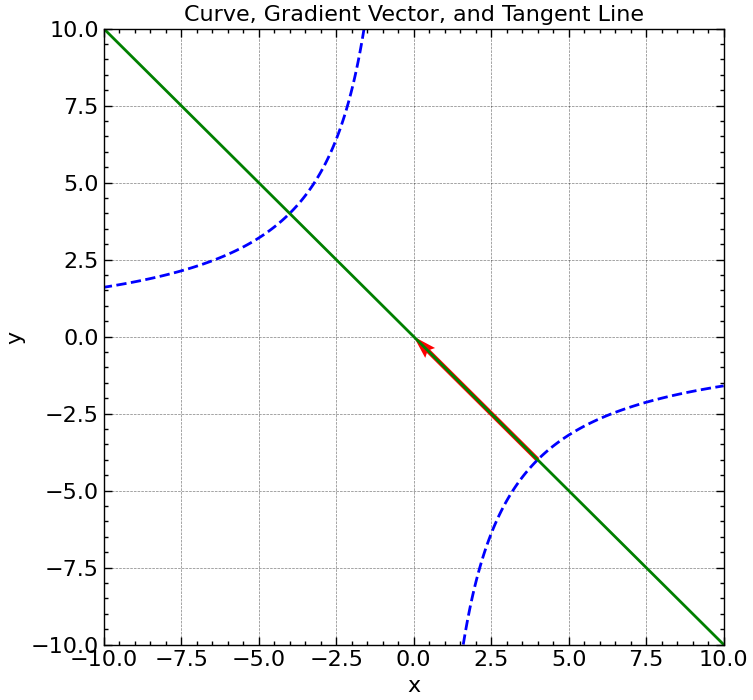

In [18]:
# Part I

# Define the function for the curve
def f(x, y):
    return x*y

# Generate x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)

# Generate z values
z = f(x, y)

# Plot the curve
plt.figure(figsize=(8, 8))
plt.contour(x, y, z, levels=[-16], colors='blue')

# Plot the gradient vector at the point (4, -4)
plt.quiver(4, -4, -4, 4, angles='xy', scale_units='xy', scale=1, color='red')

# Plot the tangent line at the point (4, -4)
x_values = np.array([-10, 10])
y_values = -x_values
plt.plot(x_values, y_values, 'green')

# Set the limits of the plot
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve, Gradient Vector, and Tangent Line')

# Show the plot
plt.grid(True)
plt.show()

In [27]:
# Part II

from sympy import symbols, diff, Eq, solve

# Define the variables
x, y = symbols('x y')

# Define the function
f = x*y

# Compute the gradient
fx = diff(f, x)
fy = diff(f, y)

# Substitute the point (11, -11) into the gradient
P_0 = {x: 4, y: -4}
fx_0 = fx.subs(P_0)
fy_0 = fy.subs(P_0)

# Define the equation of the tangent line
tangent_line = Eq(fx_0*(x - 4) + fy_0*(y - -4), 0)

# Simplify the equation
tangent_line = simplify(tangent_line)

# Print the equation of the tangent line
print("The equation of the tangent line at the point (4, -4) is:")
display(tangent_line)

The equation of the tangent line at the point (4, -4) is:


Eq(x - y, 8)

Sketch the curve f(x, y) = c together with ▽f and the tangent line at the given point

Then write an equation for the tangent line

xy = -121, (11, -11)

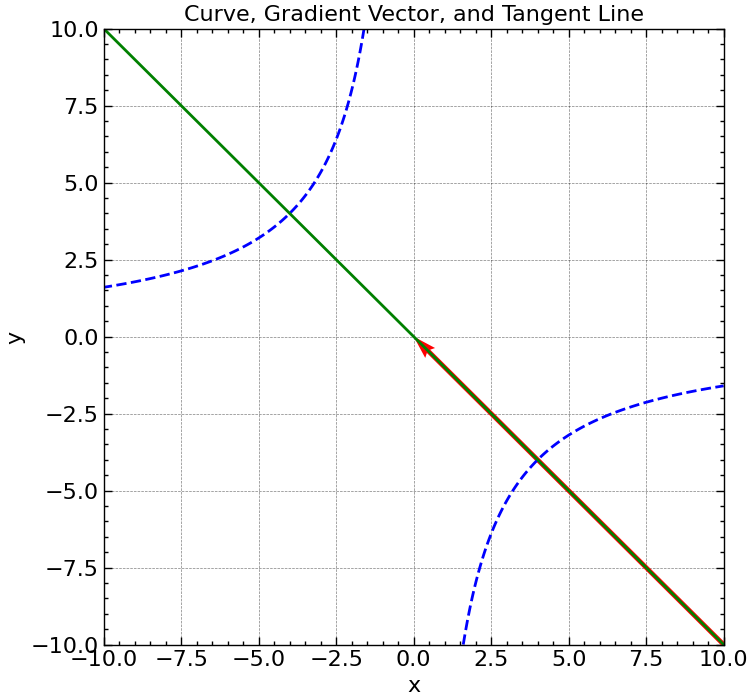

In [23]:
# Part I

# Define the function for the curve
def f(x, y):
    return x*y

# Generate x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)

# Generate z values
z = f(x, y)

# Plot the curve
plt.figure(figsize=(8, 8))
plt.contour(x, y, z, levels=[-16], colors='blue')

# Plot the gradient vector at the point (11, -11)
plt.quiver(11, -11, -11, 11, angles='xy', scale_units='xy', scale=1, color='red')

# Plot the tangent line at the point (11, -11)
x_values = np.array([-10, 10])
y_values = -x_values
plt.plot(x_values, y_values, 'green')

# Set the limits of the plot
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve, Gradient Vector, and Tangent Line')

# Show the plot
plt.grid(True)
plt.show()

In [25]:
# Part II

from sympy import symbols, diff, Eq, solve

# Define the variables
x, y = symbols('x y')

# Define the function
f = x*y

# Compute the gradient
fx = diff(f, x)
fy = diff(f, y)

# Substitute the point (11, -11) into the gradient
P_0 = {x: 11, y: -11}
fx_0 = fx.subs(P_0)
fy_0 = fy.subs(P_0)

# Define the equation of the tangent line
tangent_line = Eq(fx_0*(x - 11) + fy_0*(y - -11), 0)

# Simplify the equation
tangent_line = simplify(tangent_line)

# Print the equation of the tangent line
print("The equation of the tangent line at the point (11, -11) is:")
display(tangent_line)

The equation of the tangent line at the point (11, -11) is:


Eq(x - y, 22)

# 6

Find the equation for the tangent plane and the normal line at the point

(P_0)(8, 0, 8) on the surface 8z - x^2 = 0

A: Using a coefficient of 2 for x, the equation for the tangent plane is: 2x - z - 8 = 0

B: Find the equations for the normal line. Let x = 8 - 16t: 

x = 8 - 16t

y = 0

z = 8 + 8t

In [32]:
# A

from sympy import symbols, diff, simplify

# Define the variables
x, y, z = symbols('x y z')

# Define the function
f = 8*z - x**2

# Compute the gradient
fx = diff(f, x)
fy = diff(f, y)
fz = diff(f, z)

# Substitute the point (8, 0, 8) into the gradient
P_0 = {x: 8, y: 0, z: 8}
fx_0 = fx.subs(P_0)
fy_0 = fy.subs(P_0)
fz_0 = fz.subs(P_0)

# Define the equation of the tangent plane
tangent_plane = fx_0*(x - 8) + fy_0*(y - 0) + fz_0*(z - 8)

# Simplify the equation
tangent_plane = simplify(tangent_plane)

# Divide the equation by -8 to get a coefficient of 2 for x
tangent_plane = tangent_plane / -8

# Print the equation of the tangent plane
print("The equation of the tangent plane at the point (8, 0, 8) is: 0 =")
display(tangent_plane)

The equation of the tangent plane at the point (8, 0, 8) is: 0 =


2*x - z - 8

# 7

Find the equation for the tangent plane and the normal line at point:

P_0((1/3), 1, e) on the surface 6x(ln(y)) + y(ln(z)) = 3x

A: Using a coefficient of 3 for y, the equation for the tangent plane is: -3x + 3y + (1/e)z = 3

B: Find the equations for the normal line:

x = (1/3) - 3t

y = 1 + 3t

z = e + (e^-1)t

In [43]:
# A

from sympy import symbols, diff, log, E

# Define the variables
x, y, z = symbols('x y z')

# Define the function
f = 6*x*log(y) + y*log(z) - 3*x

# Compute the gradient (i.e., the vector of partial derivatives)
grad_f = [diff(f, var) for var in (x, y, z)]

# Evaluate the gradient at the point of tangency
grad_f_at_P0 = [deriv.evalf(subs={x: 1/3, y: 1, z: E}) for deriv in grad_f]

# Define the equation of the tangent plane
tangent_plane_equation = "-3*(x - 1/3) + 3*(y - 1) + {}*(z - E) = 0".format(grad_f_at_P0[2])

# Print the equation of the tangent plane
display(tangent_plane_equation)

# Answer = 
# -3x + 3y + (1/e)z = 3

'-3*(x - 1/3) + 3*(y - 1) + 0.367879441171442*(z - E) = 0'

# 8

Find an equation for the plane that is tangent to the given surface at the given point:

z = sqrt(y - x)

(2, 6, 2)

In [49]:
from sympy import symbols, diff

# Define the symbols
x, y, z = symbols('x y z')

# Define the function
f = x + z**2 - y

# Partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)
f_z = diff(f, z)

# Evaluate the partial derivatives at the point (2, 6, 2)
f_x_val = f_x.subs({x: 2, y: 6, z: 2})
f_y_val = f_y.subs({x: 2, y: 6, z: 2})
f_z_val = f_z.subs({x: 2, y: 6, z: 2})

# The equation of the tangent plane is given by the dot product of the gradient and the vector from the point to (x, y, z)
plane_eq = f_x_val*(x - 2) + f_y_val*(y - 6) + f_z_val*(z - 2)

# Simplify the equation
plane_eq = plane_eq.simplify()

display(plane_eq)

x - y + 4*z - 4

# 9

Find the linearization L(x, y) of the function at each point:

f(x, y) = x^2 + y^2 + 1

A: (3, 4)

B: (4, 4)

In [50]:
from sympy import symbols, diff

# Define the symbols
x, y = symbols('x y')

# Define the function
f = x**2 + y**2 + 1

# Partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Points
points = [(3, 4), (4, 4)]

for point in points:
    a, b = point

    # Evaluate the function and its derivatives at the point
    f_val = f.subs({x: a, y: b})
    f_x_val = f_x.subs({x: a, y: b})
    f_y_val = f_y.subs({x: a, y: b})

    # Linearization
    L = f_val + f_x_val*(x - a) + f_y_val*(y - b)

    # Print the result
    print(f"The linearization at point {point} is: {L}")

The linearization at point (3, 4) is: 6*x + 8*y - 24
The linearization at point (4, 4) is: 8*x + 8*y - 31


# 10

Find the linearization L(x, y) of the function f(x, y) = (e^5x)cos(3y) at the points (0, 0) and (0, pi/2)

In [53]:
from sympy import symbols, diff

# Define the symbols
x, y = symbols('x y')

# Define the function
f = (smp.exp(5*x))*smp.cos(3*y)

# Partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Points
points = [(0, 0), (0, smp.pi/2)]

for point in points:
    a, b = point

    # Evaluate the function and its derivatives at the point
    f_val = f.subs({x: a, y: b})
    f_x_val = f_x.subs({x: a, y: b})
    f_y_val = f_y.subs({x: a, y: b})

    # Linearization
    L = f_val + f_x_val*(x - a) + f_y_val*(y - b)

    # Print the result
    print(f"The linearization at point {point} is: {L}")
    display(L)

The linearization at point (0, 0) is: 5*x + 1


5*x + 1

The linearization at point (0, pi/2) is: 3*y - 3*pi/2


3*y - 3*pi/2

# 11

Find all the local maxima, local minima, and saddle points of the function:

f(x, y) = x^2 - 4xy + y^2 + 18y + 4

In [60]:
from sympy import symbols, diff, solve

# Define the symbols
x, y = symbols('x y')

# Define the function
f = x**2 - 4*x*y + y**2 + 18*y + 4

# First partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Critical points
critical_points = solve([f_x, f_y], (x, y))

# Second partial derivatives
f_xx = diff(f_x, x)
f_xy = diff(f_x, y)
f_yx = diff(f_y, x)
f_yy = diff(f_y, y)

# Since there's only one critical point, we don't need a loop
point = critical_points

# Evaluate second derivatives at the critical point
f_xx_val = f_xx.subs({x: point[x], y: point[y]})
f_xy_val = f_xy.subs({x: point[x], y: point[y]})
f_yx_val = f_yx.subs({x: point[x], y: point[y]})
f_yy_val = f_yy.subs({x: point[x], y: point[y]})

# Hessian determinant
D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

# Classification of critical point
if D > 0 and f_xx_val > 0:
    print(f"Local minimum at {point}")
elif D > 0 and f_xx_val < 0:
    print(f"Local maximum at {point}")
elif D < 0:
    print(f"Saddle point at {point}")

Saddle point at {x: 6, y: 3}


# 12

Find all local maxima, local minima, and saddle points of the function:

f(x, y) = -3x^2 + 4xy + 4x

In [61]:
from sympy import symbols, diff, solve

# Define the symbols
x, y = symbols('x y')

# Define the function
f = -3*x**2 + 4*x*y + 4*x

# First partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Critical points
critical_points = solve([f_x, f_y], (x, y))

# Second partial derivatives
f_xx = diff(f_x, x)
f_xy = diff(f_x, y)
f_yx = diff(f_y, x)
f_yy = diff(f_y, y)

# Since there's only one critical point, we don't need a loop
point = critical_points

# Evaluate second derivatives at the critical point
f_xx_val = f_xx.subs({x: point[x], y: point[y]})
f_xy_val = f_xy.subs({x: point[x], y: point[y]})
f_yx_val = f_yx.subs({x: point[x], y: point[y]})
f_yy_val = f_yy.subs({x: point[x], y: point[y]})

# Hessian determinant
D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

# Classification of critical point
if D > 0 and f_xx_val > 0:
    print(f"Local minimum at {point}")
elif D > 0 and f_xx_val < 0:
    print(f"Local maximum at {point}")
elif D < 0:
    print(f"Saddle point at {point}")

Saddle point at {x: 0, y: -1}


# 13

Find all the local maxima, local minima, and saddle points of the function:

f(x, y) = x^3 - 9xy + y^3

In [71]:
# Computes the Second Partial Derivatives

from sympy import symbols, diff, solve

# Define the symbols
x, y = symbols('x y')

# Define the function
f = x**3 - 9*x*y + y**3

# First partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Critical points
critical_points = solve([f_x, f_y], (x, y))

# Second partial derivatives
f_xx = diff(f_x, x)
f_xy = diff(f_x, y)
f_yx = diff(f_y, x)
f_yy = diff(f_y, y)

In [78]:
# Local Maxima

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for local maximum
    if D.is_real and f_xx_val.is_real and D > 0 and f_xx_val < 0:
        print(f"Local maximum at {point} with value {f.subs({x: point[0], y: point[1]})}")

In [75]:
# Local Minima

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for local minimum
    if D.is_real and f_xx_val.is_real and D > 0 and f_xx_val > 0:
        print(f"Local minimum at {point} with value {f.subs({x: point[0], y: point[1]})}")

Local minimum at (3, 3) with value -27


In [74]:
# Saddle Points

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for saddle point
    if D < 0:
        print(f"Saddle point at {point} with value {f.subs({x: point[0], y: point[1]})}")

Saddle point at (0, 0) with value 0


# 14

Find all the local maxima, local minima, and saddle points of the function:

f(x, y) = e^(2x^2 + 4y^2 - 8x)

In [119]:
# Computes the Second Partial Derivatives

from sympy import symbols, diff, solve

# Define the symbols
x, y = symbols('x y')

# Define the function
f = smp.exp(2*x**2 + 4*y**2 - 8*x)

# First partial derivatives
f_x = diff(f, x)
f_y = diff(f, y)

# Critical points
critical_points = solve([f_x, f_y], (x, y))

# Second partial derivatives
f_xx = diff(f_x, x)
f_xy = diff(f_x, y)
f_yx = diff(f_y, x)
f_yy = diff(f_y, y)

In [120]:
# Local Maxima

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for local maximum
    if D.is_real and f_xx_val.is_real and D > 0 and f_xx_val < 0:
        print(f"Local maximum at {point} with value {f.subs({x: point[0], y: point[1]})}")

In [121]:
# Local Minima

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for local minimum
    if D.is_real and f_xx_val.is_real and D > 0 and f_xx_val > 0:
        print(f"Local minimum at {point} with value {f.subs({x: point[0], y: point[1]})}")

Local minimum at (2, 0) with value exp(-8)


In [116]:
# Saddle Points

for point in critical_points:
    # Evaluate second derivatives at the critical point
    f_xx_val = f_xx.subs({x: point[0], y: point[1]})
    f_xy_val = f_xy.subs({x: point[0], y: point[1]})
    f_yx_val = f_yx.subs({x: point[0], y: point[1]})
    f_yy_val = f_yy.subs({x: point[0], y: point[1]})

    # Hessian determinant
    D = f_xx_val*f_yy_val - f_xy_val*f_yx_val

    # Check for saddle point
    if D < 0:
        print(f"Saddle point at {point} with value {f.subs({x: point[0], y: point[1]})}")

# 15

Find the absolute maximum and minimum of the function:

f(x, y) = (12x - 3x^2)cos(y) 

on the rectangular plate:

1 =< x =< 3, -pi/4 =< y =< pi/4

In [87]:
import numpy as np

# Define the function
def f(x, y):
    return (12*x - 3*x**2)*np.cos(y)

# Create a grid of points covering the rectangular plate
x = np.linspace(1, 3, 100)
y = np.linspace(-np.pi/4, np.pi/4, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the function at the grid points
Z = f(X, Y)

# Find the absolute maximum and minimum
max_value = np.max(Z)
min_value = np.min(Z)

print("Absolute maximum is", max_value)
print("Absolute minimum is", min_value)

# Numerical Form

Absolute maximum is 11.999316295497072
Absolute minimum is 6.3639610306789285


# 16

Find the maximum value of:

f(x, y) = 45 - x^2 - y^2 on the line x + 6y = 37

In [88]:
from scipy.optimize import minimize

# Define the function
def f(x):
    return -(45 - x[0]**2 - x[1]**2)

# Define the constraint
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + 6*x[1] - 37})

# Initial guess
x0 = np.array([0, 0])

# Call the minimize function
res = minimize(f, x0, constraints=cons)

# Print the maximum value and the point at which it occurs
print("Maximum value is", -res.fun, "at", res.x)

Maximum value is 7.999999999999986 at [1. 6.]


# 17

Find the points on the surface z^2 = xy + 100 closest to the origin

In [92]:
from scipy.optimize import minimize

# Define the function
def f(x):
    return x[0]**2 + x[1]**2 + x[2]**2

# Define the constraint
cons = ({'type': 'eq', 'fun': lambda x:  x[2]**2 - x[0]*x[1] - 100})

# Initial guesses
x0s = [np.array([0, 0, 1]), np.array([0, 0, -1])]

for x0 in x0s:
    # Call the minimize function
    res = minimize(f, x0, constraints=cons)

    # Print the minimum distance and the point at which it occurs
    print("Minimum distance is {:.2f} at ({:.2f}, {:.2f}, {:.2f})".format(np.sqrt(res.fun), *res.x))

Minimum distance is 10.00 at (-0.00, -0.00, 10.00)
Minimum distance is 10.00 at (-0.00, -0.00, -10.00)


Find the points on the surface z^2 = xy + 81

In [93]:
from scipy.optimize import minimize

# Define the function
def f(x):
    return x[0]**2 + x[1]**2 + x[2]**2

# Define the constraint
cons = ({'type': 'eq', 'fun': lambda x:  x[2]**2 - x[0]*x[1] - 81})

# Initial guesses
x0s = [np.array([0, 0, 1]), np.array([0, 0, -1])]

for x0 in x0s:
    # Call the minimize function
    res = minimize(f, x0, constraints=cons)

    # Print the minimum distance and the point at which it occurs
    print("Minimum distance is {:.2f} at ({:.2f}, {:.2f}, {:.2f})".format(np.sqrt(res.fun), *res.x))

Minimum distance is 9.00 at (-0.00, -0.00, 9.00)
Minimum distance is 9.00 at (-0.00, -0.00, -9.00)


# 18

Find three real numbers x, y, z whose sum is 6 and the sum of whose squares is as small as possible

In [94]:
from scipy.optimize import minimize

# Define the function
def f(x):
    return x[0]**2 + x[1]**2 + x[2]**2

# Define the constraint
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] - 6})

# Initial guess
x0 = np.array([0, 0, 0])

# Call the minimize function
res = minimize(f, x0, constraints=cons)

# Print the minimum sum of squares and the values of x, y, and z
print("Minimum sum of squares is", res.fun, "at", res.x)

Minimum sum of squares is 12.0 at [2. 2. 2.]


# 19

Find the dimensions of the closed rectangular box with maximum volume that can be inscribed in the unit sphere

In [109]:
from scipy.optimize import minimize

# Objective function: negative volume (since we want to maximize volume)
def objective(x):
    return -x[0]*x[1]*x[2]

# Constraint: l^2 + w^2 + h^2 = 4
def constraint(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 4

# Initial guess
x0 = np.array([1, 1, 1])

# Define the constraint
con = {'type': 'eq', 'fun': constraint}

# Solve the optimization problem
sol = minimize(objective, x0, constraints=con, method='SLSQP')

# Print the solution
print(sol.x)

# Numerical Form

[1.15470054 1.15470054 1.15470054]


# 20

During the 1920s, Charles Cobb and Paul Douglas modeled total population output P (of a firm, industry, or entire economy) as a function of labor hours involved x and capital invested y (which includes the monetary worth of all buildings and equipment). 

The Cobb-Douglas production function is given by P(x, y) = k(x^alpha)y^(1-alpha), where k and alpha are constants representative of a particular firm or economy. 

A: Show that a doubling of both labor and capital results in a doubling of Production P:

P(2x, 2y)

B: When the appropriate expressions are substituted into the Cobb-Douglas production function, the result is:

k((2x)^alpha)((2y)^(1-alpha))

C: Rewrite this expression using the rule (ab)^n = a^n * b^n

k * 2^alpha * x^alpha * 2^(1-alpha) * y^(1-alpha)

D: Simplify this expression using the rule a^m * a^n = a^(m+n)

2^(alpha + (1-alpha)) * k(x^alpha)(y^(1-alpha))

E: Why does this show that a doubling of both labor and capital results in a doubling of production P?

The numerical coefficient simplifies to 2, so the expression in the previous step can be rewritten as 2P(x, y)

F: Suppose a particular firm as the production function for k = 120 and alpha = 3/4. Assume that each unit of labor costs $250 and each unit of capital costs $440, and that the total expenses for all costs cannot exceed $103,000. Find the maximum production level for the firm:

To solve this problem, the maximize function is:

f(x, y) = 120(x^(3/4))(y^(1/4))

subject to the constraint

g(x, y) = 250x + 440y - 103000 = 0

G: The maximum production level for the firm is approximately ___ units.

In [111]:
# G

from scipy.optimize import minimize

# Objective function: negative production (since we want to maximize production)
def objective(x):
    return -120*(x[0]**(3/4))*(x[1]**(1/4))

# Constraint: 250x + 440y <= 103000
def constraint(x):
    return 103000 - 250*x[0] - 440*x[1]

# Initial guess
x0 = np.array([1, 1])

# Define the constraint
con = {'type': 'ineq', 'fun': constraint}

# Solve the optimization problem
sol = minimize(objective, x0, constraints=con, method='SLSQP')

# Calculate the maximum production
max_production = -sol.fun

print("The maximum production level for the firm is approximately", max_production, "units")

The maximum production level for the firm is approximately 24461.396363661745 units
